# Simple RNN Project - using Tesnsorflow inbuild IMDB data

In [ ]:
# Install the required libraries for the project:
# - tensorflow: for building and training the artificial neural network (ANN)
# - Keras: A high-level API built on top of TensorFlow for building and training neural networks.
# - numpy: for numerical computations
# - pandas: for data manipulation and analysis
# - scikit-learn: for preprocessing and evaluation
# - matplotlib: for data visualization
# - tensorboard: for visualizing the training process
# - streamlit: for creating an interactive web application
# %pip install keras tensorflow numpy pandas scikit-learn matplotlib tensorboard streamlit
# run above line if you are not yet installed the libiraries

  Using cached keras-3.9.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached streamlit-1.45.0-py3-none-any.whl.metadata (8.9 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-win_amd64.whl.metadata (22 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached grpcio-1.71.0-cp311-cp311-win_amd64.whl.metadata (4.0 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached altair-5.5.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\Users\\Mohan Govindasamy\\Documents\\AI & ML Course Training\\GitHub_Learnings\\Generative_AI_Learning\\venv\\Scripts\\tensorboard.exe' -> 'c:\\Users\\Mohan Govindasamy\\Documents\\AI & ML Course Training\\GitHub_Learnings\\Generative_AI_Learning\\venv\\Scripts\\tensorboard.exe.deleteme'
Consider using the `--user` option or check the permissions.



## <font color = 'yellow'> Importing Required Libiraies </font>

In [2]:
# Importing pandas for data manipulation and analysis
import pandas as pd

# Importing numpy for numerical computations
import numpy as np

# Importing TensorFlow for building and training neural networks
import tensorflow

# Importing the IMDB dataset from Keras, which is a part of TensorFlow
from tensorflow.keras.datasets import imdb

# Importing sequence preprocessing utilities for padding and truncating sequences
from tensorflow.keras.preprocessing import sequence

# Importing Sequential to define a linear stack of layers for the model
from tensorflow.keras.models import Sequential

# Importing Embedding layer to convert words into dense vectors of fixed size
# Importing SimpleRNN layer to build a simple recurrent neural network
# Importing Dense layer to add fully connected layers to the model
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


ModuleNotFoundError: No module named 'tensorflow.keras'

## <font color = 'yellow'>Load Data set from Tensorflow > Keras </font>

In [21]:
# initializing the maximun number of words to be used in the model
max_features = 10000 # vocabulary size

# load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
# The IMDB dataset is a set of 50,000 reviews from IMDB, labeled by sentiment (positive/negative).

# Print the shape of the training and testing data
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)  
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (25000,)
y_train shape: (25000,)
x_test shape: (25000,)
y_test shape: (25000,)


### Extras to analysis dataset


In [22]:
x_train[0] # Print the first training sample
# The output is a list of integers representing the words in the review.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [23]:
y_train[0] # Print the label of the first training sample
# The output is 1, indicating a positive review.
int(y_train[0]) # Convert the label to an integer for better readability



1

In [24]:
sample_review = x_train[0] # Get the first review from the training set
sample_label = y_train[0] # Get the corresponding label
print("Sample review:", sample_review) # Print the sample review
print("Sample label:", sample_label) # Print the sample label

Sample review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Sample label: 1


## <font color = 'yellow'> Pre-Processing </font>

In [25]:
# get word index from the IMDB dataset
word_index = imdb.get_word_index() # Get the word index mapping from the IMDB dataset

# verify the word index maping
word_index # Print the word index mapping
# The word index is a dictionary mapping words to their integer indices in the dataset.

# reverse the word index mapping to get a mapping from indices to words
reversce_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# Reverse the word index mapping using list comprehension then converts it to a dictionary.
# The reversed mapping allows us to convert integer indices back to words.
# Print the first 10 entries of the reversed word index mapping
for i in range(10):
    if i in reversce_word_index:  # Check if the key exists in the dictionary
        print(i, ":", reversce_word_index[i]) # Print the first 10 entries of the reversed mapping
# The output shows the first 10 entries of the reversed word index mapping, where each entry is a tuple of (index, word).

reversce_word_index

# #  reverse the word index mapping to get a mapping from indices to words
# reversce_word_index = {value:key for (key, value) in word_index.items()}
# # ussing dist comprehension to reverse the word index mapping



1 : the
2 : and
3 : a
4 : of
5 : to
6 : is
7 : br
8 : in
9 : it


{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [26]:
# display first review in the training set
# decode the review using the reversed word index mapping
sample_review = x_train[1] # Get the first review from the training set
decode_review = ' '.join([reversce_word_index.get(i-3, '?') for i in sample_review]) # Decode the review using the reversed word index mapping
decode_review

'''
code explaination:
- The list comprehension iterates over each index in the sample review.

[reversce_word_index.get(i-3, '?') for i in sample_review]:

for i in sample_review
    This iterates over each value i in sample_review (which likely contains tokenized word indices from a text dataset).

reversce_word_index.get(i-3, '?')
    It retrieves the corresponding word from reverse_word_index using .get(i-3, '?').
        - i-3: Adjusts the index (sometimes needed in datasets like IMDB reviews where indices 0, 1, 2 are reserved for padding, start-of-sequence, and unknown tokens).
        - '?': This is the default value returned if the index i-3 is not found in reverse_word_index.
        - .get(i-3, '?'): If i-3 is missing in reverse_word_index, it returns '?', preventing errors.

' '.join([...])
    ' '.join([...]) merges the words in the list into a single string, with spaces between them, forming a human-readable sentence.

'''

"\ncode explaination:\n- The list comprehension iterates over each index in the sample review.\n\n[reversce_word_index.get(i-3, '?') for i in sample_review]:\n\nfor i in sample_review\n    This iterates over each value i in sample_review (which likely contains tokenized word indices from a text dataset).\n\nreversce_word_index.get(i-3, '?')\n    It retrieves the corresponding word from reverse_word_index using .get(i-3, '?').\n        - i-3: Adjusts the index (sometimes needed in datasets like IMDB reviews where indices 0, 1, 2 are reserved for padding, start-of-sequence, and unknown tokens).\n        - '?': This is the default value returned if the index i-3 is not found in reverse_word_index.\n        - .get(i-3, '?'): If i-3 is missing in reverse_word_index, it returns '?', preventing errors.\n\n' '.join([...])\n    ' '.join([...]) merges the words in the list into a single string, with spaces between them, forming a human-readable sentence.\n\n"

## <font color = 'yellow'> Pre-Processing using Tensorflow </font>

In [27]:
# Import necessary module for sequence preprocessing in TensorFlow
from tensorflow.keras.preprocessing import sequence

# Set the maximum sequence length to ensure uniform input size
max_len = 600

# Apply padding to training data
# - If a sequence is shorter than max_len, it is padded with zeros.
# - If a sequence is longer than max_len, it is truncated.
x_train = sequence.pad_sequences(x_train, maxlen=max_len, padding='pre')

# Apply padding to test data using the same approach
x_test = sequence.pad_sequences(x_test, maxlen=max_len, padding='pre')

# Display the shape of the transformed training data
print(x_train.shape)  # Expected output: (num_samples, 600)



'''
Note:
1. sequence.pad_sequences() is used to ensure all sequences have the same length, which is required for neural network models.

2. in the above - max_len = 500
    This sets the maximum sequence length to 500.
    Any sequence shorter than 500 will be padded (usually with zeros).
    Any sequence longer than 500 will be truncated.

3. after padding the sequence the data
    It ensures that all sequences in these datasets are exactly 500 tokens long
    - If a sequence is shorter than max_len (500) → Adds padding (default is zeros) at the beginning or end.
    - If a sequence is longer than max_len (500) → Truncates extra tokens.
    - This ensures consistent input size, which is essential for training deep learning models.

4. now contains uniform-length sequences, ready to be passed into a neural network.
'''

(25000, 600)


'\nNote:\n1. sequence.pad_sequences() is used to ensure all sequences have the same length, which is required for neural network models.\n\n2. in the above - max_len = 500\n    This sets the maximum sequence length to 500.\n    Any sequence shorter than 500 will be padded (usually with zeros).\n    Any sequence longer than 500 will be truncated.\n\n3. after padding the sequence the data\n    It ensures that all sequences in these datasets are exactly 500 tokens long\n    - If a sequence is shorter than max_len (500) → Adds padding (default is zeros) at the beginning or end.\n    - If a sequence is longer than max_len (500) → Truncates extra tokens.\n    - This ensures consistent input size, which is essential for training deep learning models.\n\n4. now contains uniform-length sequences, ready to be passed into a neural network.\n'

In [28]:
x_train

array([[   0,    0,    0, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,    4, 3586,    2],
       [   0,    0,    0, ...,   12,    9,   23],
       [   0,    0,    0, ...,  204,  131,    9]], dtype=int32)

## <font color = 'yellow'>Create / Build Recurrent neural network (RNN) Model </font>

### Import Required Libiraries

In [29]:
import tensorflow
import keras

# Checking the tensorflow libraries
print(tensorflow.__version__)

# checking the keras libraries
print(keras.__version__)

2.19.0
3.9.2


In [30]:
x_train.shape

(25000, 600)

### Create Model - RNN

In [31]:
# Step 01: Initialize Sequential Model
# Sequential means layers are added one after another in a sequence.
model = keras.Sequential([
    
    # Step 02: Input Layer - Embedding Layer
    # Converts word indices into dense vectors of fixed size (word embeddings).
    # max_features: Total number of unique words considered (vocabulary size).
    # 256: Each word will be represented as a 256-dimensional vector.
    # input_length = max_len: Ensures all sequences are of the same length.
    keras.layers.Embedding(input_dim=max_features, output_dim=256, input_length=max_len),
    
    # Step 03: Hidden Layer - SimpleRNN Layer
    # A Simple Recurrent Neural Network (RNN) layer with 256 units.
    # It helps process sequences (e.g., sentences) by maintaining memory across inputs.
    # Activation function 'relu': Helps introduce non-linearity for better learning.
    
    # # First RNN layer (returns sequences to pass to the next layer)
    # keras.layers.SimpleRNN(256, activation='relu', return_sequences=True),

    # Second RNN layer (also returns sequences)
    keras.layers.SimpleRNN(128, activation='relu', return_sequences=True),

    # Third RNN layer (does NOT return sequences, outputs final state)
    keras.layers.SimpleRNN(64, activation='relu'),
    
    # Step 04: Output Layer - Dense Layer
    # A fully connected layer that outputs a single value (binary classification).
    # Activation function 'sigmoid': Compresses the output to a probability range (0 to 1).
    # Output Layer (binary classification)
    keras.layers.Dense(units=1, activation='sigmoid')  # Outputs a single neuron for binary classification.
    
])

# Step 05: Model Summary
# Displays the architecture, layer details, and the number of trainable parameters.
model.summary()

'''
Explanation of Components used in Sequential components
    - Embedding Layer: Converts words into numerical vectors (word embeddings) for better contextual understanding.
    - SimpleRNN Layer: Processes sequences step by step, learning dependencies between words.
    - Dense Output Layer: Uses sigmoid activation to output probabilities (ideal for binary classification).
    - Model Summary: Displays a summary of layers and parameter counts.
'''


c:\Users\Mohan Govindasamy\Documents\AI & ML Course Training\GitHub_Learnings\Generative_AI_Learning\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

'\nExplanation of Components used in Sequential components\n    - Embedding Layer: Converts words into numerical vectors (word embeddings) for better contextual understanding.\n    - SimpleRNN Layer: Processes sequences step by step, learning dependencies between words.\n    - Dense Output Layer: Uses sigmoid activation to output probabilities (ideal for binary classification).\n    - Model Summary: Displays a summary of layers and parameter counts.\n'

### Compile this Model / neural network (RNN)

In [32]:
# compile model with
# 1. Optimizer: Adam (adaptive learning rate for efficient training)
# 2. Loss Function: Suitable for binary classification (0 or 1 output)
# 3. Metric: Measures how often predictions match the actual labels

model.compile(
    optimizer='adam',               # Optimizer: Adam (adaptive learning rate for efficient training)
    loss='binary_crossentropy',     # Loss Function: Suitable for binary classification (0 or 1 output)
    metrics=['accuracy']            # Metric: Measures how often predictions match the actual labels
)



# summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### Setup tensorboard

In [33]:
from keras.callbacks import TensorBoard
import datetime

# creating logs directory
log_fs = "logs/fit/"+ datetime.datetime.now().strftime("%y%m%d-%H%M%S")
tensorflow_callback = TensorBoard(log_dir=log_fs, histogram_freq=1)

### Setup early stoping
to prevent overfitting by stopping training once the model's performance on a validation set starts to decline. It helps ensure that the model generalizes well to unseen data rather than memorizing the training data.


In [34]:
# Import EarlyStopping callback from Keras
from keras.callbacks import EarlyStopping

# Define EarlyStopping Callback
early_stopping = EarlyStopping(
    monitor='val_loss',           # Monitors validation loss during training
    patience=5,                   # Stops training if loss does not improve for 5 consecutive epochs
    restore_best_weights=True,    # Restores model weights from the epoch with the best validation loss
    mode='min'                    # Ensures the monitored metric is minimized (ideal for loss functions)
)

### Train Model with Early stoping (along with Test data validations)

In [35]:
# Train the model using training and test data,
# while utilizing TensorBoard and EarlyStopping callbacks.
history = model.fit(
    x_train,               # Training input features
    y_train,               # Training labels
    validation_data=(x_test, y_test),  # Validation dataset (used to monitor performance) # More precise control over validation set.
    # validation_split=0.2,  # Automatically splits 20% of X_train for validation.  #Does not require separate validation data (X_test, y_test).Useful when validation data is not explicitly provided.
    batch_size=32,         # Number of samples per gradient update
    epochs=10,            # Maximum number of training iterations (epochs) (Note : Shorter training may prevent overfitting but might not be enough for complex tasks.)
    callbacks=[tensorflow_callback, early_stopping],  # Callback functions: TensorBoard for visualization & EarlyStopping for optimized training
    verbose=1              # Print detailed training progress output
)

# Display the model architecture, layer details, and parameter count
model.summary()

# Print the keys available in the training history dictionary
# This shows what metrics were tracked during training (e.g., accuracy, loss)
print(history.history.keys())

# Access training and validation accuracy
print("Training Accuracy:", history.history['accuracy'])    # Accuracy on training data
print("Validation Accuracy:", history.history['val_accuracy'])  # Accuracy on validation data

# Access training and validation loss
print("Training Loss:", history.history['loss'])    # Model’s loss on training data
print("Validation Loss:", history.history['val_loss'])  # Model’s loss on validation data

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 276s 349ms/step - accuracy: 0.6456 - loss: 112.5745 - val_accuracy: 0.7842 - val_loss: 0.4607
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 328s 419ms/step - accuracy: 0.8283 - loss: 0.3839 - val_accuracy: 0.7474 - val_loss: 0.5016
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 279s 357ms/step - accuracy: 0.8886 - loss: 0.2800 - val_accuracy: 0.8440 - val_loss: 0.3760
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 285s 364ms/step - accuracy: 0.9354 - loss: 0.1715 - val_accuracy: 0.8312 - val_loss: 0.4279
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 286s 366ms/step - accuracy: 0.9555 - loss: 0.1235 - val_accuracy: 0.8391 - val_loss: 0.4764
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 275s 351ms/step - accuracy: 0.9475 - loss: 0.1325 - val_accuracy: 0.8359 - val_loss: 0.5633
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 275s 351ms/step - accuracy: 0.9741 - loss: 0.0782 - val_accuracy: 0.8246 - val_loss: 0.6020
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 282s 360ms/step - accuracy: 0.9532

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 600, 256)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 600, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,865,093 (30.00 MB)

 Trainable params: 2,621,697 (10.00 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,243,396 (20.00 MB)

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
Training Accuracy: [0.7020000219345093, 0.8337600231170654, 0.8960400223731995, 0.9301999807357788, 0.949720025062561, 0.9530799984931946, 0.9733200073242188, 0.9650800228118896]
Validation Accuracy: [0.7842400074005127, 0.7473599910736084, 0.8440399765968323, 0.8311600089073181, 0.8390799760818481, 0.835919976234436, 0.8245999813079834, 0.8225200176239014]
Training Loss: [206.8404998779297, 0.3775540292263031, 0.2615761458873749, 0.1809711903333664, 0.13547435402870178, 0.1238936111330986, 0.07669655233621597, 0.09717259556055069]
Validation Loss: [0.4606955349445343, 0.5015568733215332, 0.3760053813457489, 0.427922785282135, 0.4763559103012085, 0.5633460879325867, 0.6020415425300598, 0.7190569043159485]


### Save the Trained Model

In [ ]:
from tensorflow.keras.models import load_model

# save HDF5 model
model.save('my_rnn_model.h5')

# save Keras model
model.save('my_rnn_model.keras')

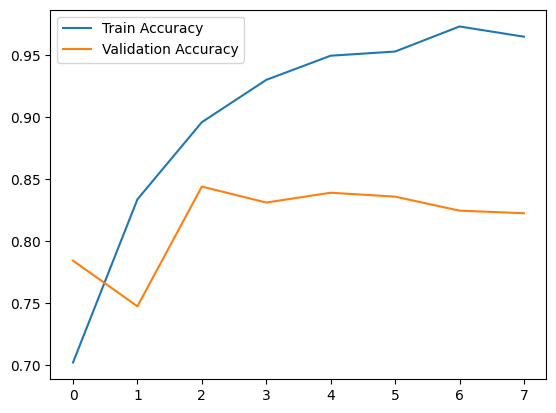

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

### Tensorboard

In [41]:
# load extention for tensorboard
%load_ext tensorboard
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [40]:
%tensorboard --logdir logs/fit/

Reusing TensorBoard on port 6007 (pid 135352), started 0:00:21 ago. (Use '!kill 135352' to kill it.)

### Extra for automated save model
Automate model saving during training using ModelCheckpoint, a Keras callback that saves the model at different stages of training

In [ ]:
# Import necessary modules
from keras.models import Sequential, load_model
from keras.layers import Embedding, SimpleRNN, Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define model parameters
max_features = 10000  # Vocabulary size
max_len = 500         # Maximum sequence length

# Step 1: Initialize Model
model = Sequential([
    Embedding(input_dim=max_features, output_dim=256, input_length=max_len),  # Word Embeddings
    SimpleRNN(256, activation='relu', return_sequences=True),  # First RNN Layer
    SimpleRNN(128, activation='relu', return_sequences=True),  # Second RNN Layer
    SimpleRNN(64, activation='relu'),  # Third RNN Layer (Final hidden layer)
    Dense(1, activation='sigmoid')  # Output Layer (Binary Classification)
])

# Step 2: Compile Model
model.compile(
    optimizer='adam',               # Adaptive learning rate optimizer
    loss='binary_crossentropy',      # Suitable for binary classification tasks
    metrics=['accuracy']             # Track accuracy during training
)

# Step 3: Define Callbacks for Automatic Model Saving & Early Stopping
checkpoint_callback = ModelCheckpoint(
    filepath='best_model.keras',      # Save best model file
    monitor='val_loss',               # Monitor validation loss
    save_best_only=True,              # Save only when improvement is detected
    save_weights_only=False,          # Save the full model
    mode='min',                        # Minimize validation loss
    verbose=1                          # Show save status
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',                # Stop training if validation loss stagnates
    patience=5,                         # Allow 5 epochs of no improvement before stopping
    restore_best_weights=True,         # Load best weights after stopping
    mode='min',                         # Minimize validation loss
    verbose=1
)

# Step 4: Train Model with Training Data
history = model.fit(
    x_train, y_train,                 # Training data
    validation_data=(x_test, y_test),  # Validation data
    epochs=50,                         # Maximum epochs
    batch_size=32,                     # Batch size for efficiency
    callbacks=[checkpoint_callback, early_stopping_callback],  # Apply callbacks
    verbose=1                          # Print training progress
)

# Step 5: Save Model Manually After Training
model.save('final_model.keras')  # Save final trained model

# Step 6: Load the Best Model After Training
best_model = load_model('best_model.keras')

# Step 7: Print Available Keys in Training History
print("Available Metrics:", history.history.keys())

# Step 8: Access Training and Validation Performance
print("Training Accuracy:", history.history['accuracy'])
print("Validation Accuracy:", history.history['val_accuracy'])
print("Training Loss:", history.history['loss'])
print("Validation Loss:", history.history['val_loss'])